<a href="https://colab.research.google.com/github/RawCheer/ML/blob/master/NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


In [0]:
x_train_vec = x_train.reshape(60000,784)
x_test_vec = x_test.reshape(10000,784)

In [0]:
def to_one_hot(labels, dimension = 10):
  results = np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1
  return results

In [5]:
y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)
print('Shape of y_train_vec is '+ str(y_train_vec.shape))

Shape of y_train_vec is (60000, 10)


In [0]:
rand_indices = np.random.permutation(60000)
#random permutation likes LSH
train_indices = rand_indices[:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[valid_indices,:]
y_valid_vec = y_train_vec[valid_indices,:]

x_train_vec = x_train_vec[train_indices,:]
y_train_vec = y_train_vec[train_indices,:]

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(10,activation='softmax',input_shape=(784,)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
model.compile(optimizers.RMSprop(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train_vec,y_train_vec,
                    batch_size=128, epochs=50,
                    validation_data=(x_valid_vec,y_valid_vec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 21us/step - loss: 48.2472 - accuracy: 0.4689 - val_loss: 15.6444 - val_accuracy: 0.7230
Epoch 2/50
50000/50000 [==============================] - 1s 15us/step - loss: 11.7997 - accuracy: 0.7775 - val_loss: 9.0508 - val_accuracy: 0.8173
Epoch 3/50
50000/50000 [==============================] - 1s 15us/step - loss: 8.0599 - accuracy: 0.8313 - val_loss: 7.1238 - val_accuracy: 0.8452
Epoch 4/50
50000/50000 [==============================] - 1s 15us/step - loss: 6.5866 - accuracy: 0.8520 - val_loss: 6.2438 - val_accuracy: 0.8562
Epoch 5/50
50000/50000 [==============================] - 1s 15us/step - loss: 5.7624 - accuracy: 0.8621 - val_loss: 5.5577 - val_accuracy: 0.8651
Epoch 6/50
50000/50000 [==============================] - 1s 14us/step - loss: 5.2144 - accuracy: 0.8690 - val_loss: 5.1887 - val_accuracy: 0.8682
Epoch 7/50
50000/50000 [==============================] - 1s 15us

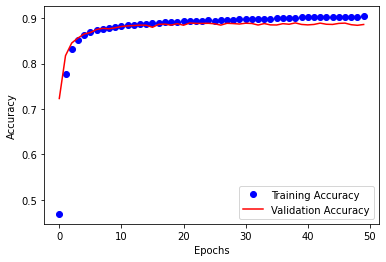

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc,'bo',label = 'Training Accuracy')
plt.plot(epochs, valid_acc,'r',label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
loss_and_acc = model.evaluate(x_test_vec,y_test_vec)
print('loss = '+str(loss_and_acc[0]))
print('accuracy = '+str(loss_and_acc[1]))

10000/10000 [==============================] - 0s 19us/step
loss = 1.9390788737671667
accuracy = 0.8862000107765198


In [0]:
from keras import models
from keras import layers

d1 = 500 #width of the 1st hidden layer
d2 = 500

model = models.Sequential()
model.add(layers.Dense(d1,activation='relu',input_shape=(784,)))
model.add(layers.Dense(d1,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
model.compile(optimizers.RMSprop(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train_vec,y_train_vec,
                    batch_size=128, epochs=50,
                    validation_data=(x_valid_vec,y_valid_vec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 127us/step - loss: 4.3176 - accuracy: 0.8456 - val_loss: 1.6536 - val_accuracy: 0.9194
Epoch 2/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.0196 - accuracy: 0.9380 - val_loss: 1.3288 - val_accuracy: 0.9262
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.5391 - accuracy: 0.9604 - val_loss: 0.9741 - val_accuracy: 0.9430
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.3175 - accuracy: 0.9720 - val_loss: 0.8518 - val_accuracy: 0.9498
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.1916 - accuracy: 0.9793 - val_loss: 0.7574 - val_accuracy: 0.9547
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.1411 - accuracy: 0.9839 - val_loss: 0.7522 - val_accuracy: 0.9568
Epoch 7/50
50000/50000 [==============================] - 6s 1

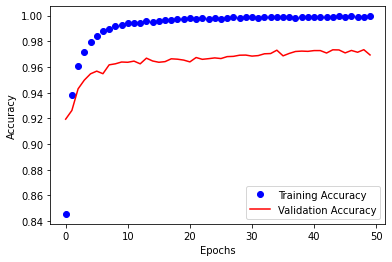

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc,'bo',label = 'Training Accuracy')
plt.plot(epochs, valid_acc,'r',label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
loss_and_acc = model.evaluate(x_test_vec,y_test_vec)
print('loss = '+str(loss_and_acc[0]))
print('accuracy = '+str(loss_and_acc[1]))

10000/10000 [==============================] - 1s 66us/step
loss = 0.8083058192223674
accuracy = 0.9692000150680542
